---
# Section 3.1: The Discrete Least Squares Problem
---

## Over-determined linear systems

Let $A \in \mathbb{R}^{m \times n}$ and $b \in \mathbb{R}^m$. 

If $m > n$, we say the linear system 

$$
Ax = b
$$ 

is **over-determined**.

Often over-determined linear systems have no solution, typically due to measurement errors in  $b$.

---

## Example

In [13]:
A = rand(5, 2)

5x2 Array{Float64,2}:
 0.980623   0.144687
 0.0125327  0.559957
 0.876433   0.175131
 0.572682   0.699568
 0.657154   0.58885 

In [14]:
b = rand(5)

5-element Array{Float64,1}:
 0.122412 
 0.399037 
 0.121687 
 0.0124721
 0.828191 

In [15]:
x = A\b

2-element Array{Float64,1}:
 0.0629871
 0.574559 

In [16]:
r = b - A*x

5-element Array{Float64,1}:
 -0.0224858
  0.0765191
 -0.0341398
 -0.425543 
  0.448469 

In [17]:
norm(r)

0.624289780230064

---

## Minimizing the error

Since we cannot solve $Ax=b$ exactly, we want to find $x$ such that the **residual**

$$
r = b - Ax
$$

is as small as possible:

$$
\min_x \|b - Ax\|
$$

We can consider many different norms, such as:

$$
\|b - Ax\|_1 = \sum_{i=1}^m \big| b_i - (Ax)_i \big| = \sum_{i=1}^m \big| b_i - a_i^Tx \big|
$$

$$
\|b - Ax\|_2 = \sqrt{\sum_{i=1}^m \big( b_i - (Ax)_i \big)^2} = \sqrt{\sum_{i=1}^m \big( b_i - a_i^Tx \big)^2}
$$

$$
\|b - Ax\|_\infty = \max_{1\leq i\leq m} \big| b_i - (Ax)_i \big| = \max_{1\leq i\leq m} \big| b_i - a_i^Tx \big|
$$





---

## Least squares

When the error in the entries of $b$ are believed to be **identically and independently [normally distributed](https://en.wikipedia.org/wiki/Normal_distribution)** with **zero mean** and **constant variance**, the best choice is to minimize $\|b - Ax\|_2$. 

In this case, the $x$ that minimizes $\|b - Ax\|_2$ is the **maximum likelihood estimator** of the true solution.

Minimizing $\|b - Ax\|_2$ is equivalent to minimizing

$$
\|b - Ax\|_2^2 = \sum_{i=1}^m \big( b_i - (Ax)_i \big)^2.
$$


The $x$ that minimizes $\|b - Ax\|_2$ (or equivalently $\|b - Ax\|_2^2$) is called the **least-squares solution** because it is minimizing the **sum-of-the-squares** of the errors.

![Paranormal distribution](http://m.jech.bmj.com/content/60/1/6/embed/graphic-1.gif "A visual comparison of normal and paranormal distributions")

<center>
[A visual comparison of normal and paranormal distributions](http://jech.bmj.com/content/60/1/6.full) by Matthew Freeman
</center>


---

## `randn`

In [18]:
?randn

search: randn randn! sprandn randstring rand! rand randexp randperm randjump



```
randn([rng], [dims...])
```

Generate a normally-distributed random number with mean 0 and standard deviation 1. Optionally generate an array of normally-distributed random numbers.


In [19]:
v = randn(10^6)

1000000-element Array{Float64,1}:
 -1.09875  
 -0.217702 
 -2.36002  
  0.443298 
 -1.91265  
 -1.18875  
 -0.0946311
 -0.0685427
 -0.505857 
  0.0663892
 -0.272436 
  1.52774  
  0.654993 
  ⋮        
  0.63479  
  0.495808 
  0.9876   
  0.643825 
 -0.479473 
 -0.289588 
  0.494109 
 -0.46274  
 -1.1256   
 -0.51905  
  0.762765 
  1.54661  

In [20]:
mean(v)

0.0007812096851375357

In [21]:
cov(v)

1.000003562839599

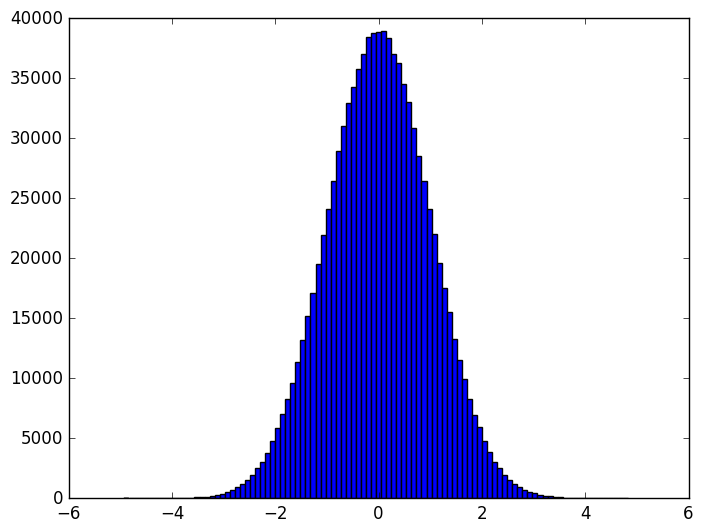

In [25]:
using PyPlot

plt[:hist](v, 100);

---

## Solving the least-squares problem

In Julia (or MATLAB), we can solve the least-squares problem

$$
\min_x \|b - Ax\|_2
$$

by using the same **backslash** function that we used to solve $n \times n$ linear systems:

```julia
x = A\b
```

Julia will recognize that the linear system is over-determined and will use an algorithm for solving the least-squares problem that is based on the $QR$-factorization of $A$.

---

## Example

In [26]:
A = rand(5, 2)

5x2 Array{Float64,2}:
 0.994875   0.66812 
 0.0519849  0.891104
 0.377684   0.240133
 0.450219   0.824525
 0.602874   0.25202 

In [28]:
xtrue = rand(2)
b = A*xtrue + 0.01*randn(5)  # Add random noise to b
[A*xtrue b]

5x2 Array{Float64,2}:
 0.797634  0.771926
 0.166641  0.163511
 0.300835  0.303016
 0.437173  0.439196
 0.461042  0.465   

In [29]:
# Solve the least-squares problem:  minimize norm(b - A*x)
x = A\b

2-element Array{Float64,1}:
 0.690975
 0.14601 

In [30]:
xtrue

2-element Array{Float64,1}:
 0.703728
 0.145951

In [31]:
b - A*x

5-element Array{Float64,1}:
 -0.0130598 
 -0.00251933
  0.00698364
  0.00771616
  0.0116315 

In [32]:
norm(b - A*x)

0.02050629478329706

In [33]:
norm(b - A*xtrue)

0.026366899725317826

In [34]:
@which A\b

\(A::Union{DenseArray{T,2},SubArray{T,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}, B::Union{DenseArray{T,1},DenseArray{T,2},SubArray{T,1,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD},SubArray{T,2,A<:DenseArray{T,N},I<:Tuple{Vararg{Union{Colon,Int64,Range{Int64}}}},LD}}) at linalg/dense.jl:442

In [35]:
@edit A\b

---

## The $QR$-factorization

The $QR$-factorization of $A$ is

$$
A = QR
$$

where 

- $Q$ is an $m \times m$ orthogonal matrix ($Q^TQ = QQ^T = I$),
- $R$ is an $m \times n$ "upper-triangular" matrix.

Alternatively, we can obtain a more compact $QR$-factorization $A = QR$, where

- $Q$ is an $m \times n$ matrix with orthonormal columns ($Q^TQ = I$),
- $R$ is an $n \times n$ upper-triangular matrix.

---

## `qr`

In [36]:
A = rand(5, 2)

5x2 Array{Float64,2}:
 0.768105  0.61718 
 0.720759  0.516095
 0.901223  0.367186
 0.549409  0.600174
 0.502923  0.586592

In [37]:
?qr

search: qr qrfact qrfact! sqrt sqrtm isqrt require quiver quiverkey QuickSort



```
qr(A [,pivot=Val{false}][;thin=true]) -> Q, R, [p]
```

Compute the (pivoted) QR factorization of `A` such that either `A = Q*R` or `A[:,p] = Q*R`. Also see `qrfact`. The default is to compute a thin factorization. Note that `R` is not extended with zeros when the full `Q` is requested.


In [41]:
Q, R = qr(A, thin=false)

(
5x5 Array{Float64,2}:
 -0.488095   0.13927    -0.155598  -0.599651   -0.598811
 -0.458009  -0.0197612  -0.789935   0.261153    0.312472
 -0.572686  -0.688447    0.42194    0.0804756   0.116455
 -0.349124   0.478389    0.274743   0.672362   -0.348859
 -0.319584   0.526685    0.313488  -0.337152    0.639157,

2x2 Array{Float64,2}:
 -1.57368  -1.1449  
  0.0       0.419034)

In [43]:
Q*[R; zeros(3,2)] - A

5x2 Array{Float64,2}:
 -2.22045e-16  -1.11022e-16
 -1.11022e-16  -1.11022e-16
  0.0          -5.55112e-17
  0.0          -1.11022e-16
  0.0           0.0        

In [44]:
Q'*Q

5x5 Array{Float64,2}:
  1.0           3.6236e-17   -6.35387e-17  -8.73521e-17  -9.3879e-17 
  3.6236e-17    1.0           6.92134e-17  -8.1931e-17    9.93764e-20
 -6.35387e-17   6.92134e-17   1.0          -3.95399e-17   3.27321e-17
 -8.73521e-17  -8.1931e-17   -3.95399e-17   1.0           1.25804e-17
 -9.3879e-17    9.93764e-20   3.27321e-17   1.25804e-17   1.0        

---

## Data-fitting

Suppose we are trying to approximate the true function

$$
y(t) = 1 + e^t + 3e^{-t}
$$

given a number of noisy **data points**

$$
(t_1, y_1), \ldots, (t_m, y_m)
$$

where

$$
y_i = y(t_i) + \varepsilon_i, \quad i = 1,\ldots,m,
$$

and each $\varepsilon_i$ is drawn from a [normal distribution](https://en.wikipedia.org/wiki/Normal_distribution) with mean $0$ and variance $\sigma^2$:

$$
\varepsilon_i \sim \mathcal{N}(0,\sigma^2).
$$

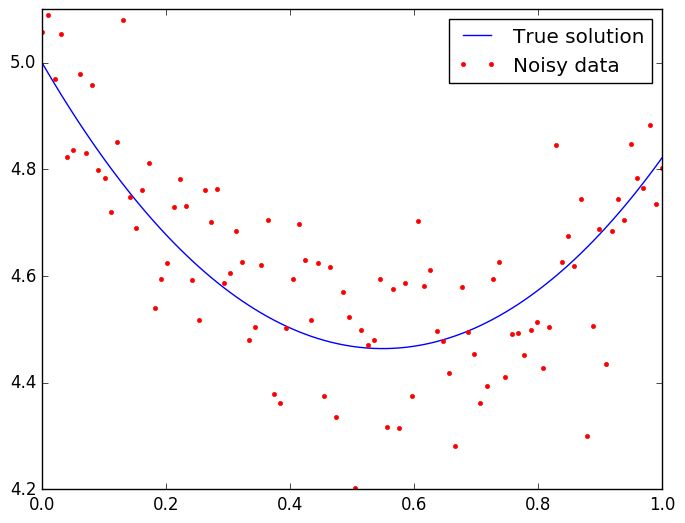

In [45]:
using PyPlot

y(t) = 1 + exp(t) + 3*exp(-t)

m = 100
tt = linspace(0, 1, m)

σ = 0.1
err = σ*randn(m)
yy = y(tt) + err

plot(tt, y(tt), label="True solution")
plot(tt, yy, "r.", label="Noisy data")
legend();

We let our approximation be given by

$$
p(t) = x_1 + x_2 e^t + x_3 e^{-t}
$$

and we want to find the **maximum likelihood estimate** of the coefficients $x_1, x_2, x_3$.

We want to minimize

$$
\sum_{i=1}^m \big(y_i - p(t_i)\big)^2.
$$

The residual $y_i - p(t_i)$ can be written as

$$
y_i - \left(x_1 + x_2 e^{t_i} + x_3 e^{-t_i}\right) = y_i - \begin{bmatrix} 1 & e^{t_i} & e^{-t_i} \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \\ x_3 \end{bmatrix}.
$$

Therefore, the $i^\mathrm{th}$-row of the matrix $A$ is $\begin{bmatrix} 1 & e^{t_i} & e^{-t_i} \end{bmatrix}$:

$$
A = 
\begin{bmatrix} 
1 & e^{t_1} & e^{-t_1} \\
1 & e^{t_2} & e^{-t_2} \\
\vdots&\vdots&\vdots\\
1 & e^{t_m} & e^{-t_m} \\
\end{bmatrix}
$$

and $b \in \mathbb{R}^m$ such that $b_i = y_i$ for $i = 1,\ldots,m$. 

Then 

$$
\sum_{i=1}^m \big(y_i - p(t_i)\big)^2 = \|b - Ax\|_2^2.
$$

In [46]:
## True model:  y = 1 + exp(t) + 3*exp(-t)
A = [ones(tt) exp(tt) exp(-tt)]
b = yy

## Solve the least squares problem:  min norm(b - A*x)
x = A\b

3-element Array{Float64,1}:
 1.17687 
 0.927163
 2.92872 

In [47]:
## Compute the norm of the residual
r = b - A*x
norm(r)

1.131355093671051

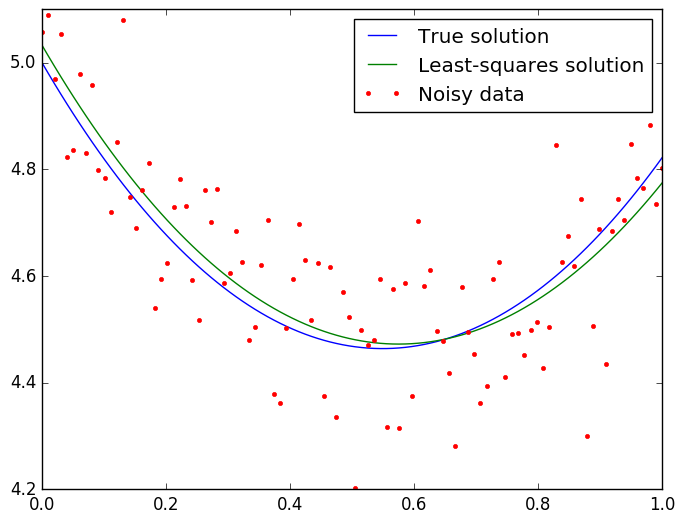

In [48]:
using PyPlot

p(t) = x[1] + x[2]*exp(t) + x[3]*exp(-t)

plot(tt, y(tt), label="True solution")
plot(tt, p(tt), label="Least-squares solution")
plot(tt, yy, "r.", label="Noisy data")

legend(loc="best");

---